
# **0. Mask augmentation**

*   mount google drive
*   MaskTheFace github (https://github.com/aqeelanwar/MaskTheFace.git)
*   include mask augmented face image samples in report



In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/MyDrive/detect_mask'

/content/gdrive/MyDrive/detect_mask


In [ ]:

# !unzip not_wearing_mask.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: not_wearing_mask/face2116.jpg  
  inflating: not_wearing_mask/face2117.jpg  
  inflating: not_wearing_mask/face212.jpg  
  inflating: not_wearing_mask/face2120.jpg  
  inflating: not_wearing_mask/face2126.jpg  
  inflating: not_wearing_mask/face2127.jpg  
  inflating: not_wearing_mask/face2128.jpg  
  inflating: not_wearing_mask/face213.jpg  
  inflating: not_wearing_mask/face2130.jpg  
  inflating: not_wearing_mask/face2131.jpg  
  inflating: not_wearing_mask/face2132.jpg  
  inflating: not_wearing_mask/face2133.jpg  
  inflating: not_wearing_mask/face2136.jpg  
  inflating: not_wearing_mask/face2137.jpg  
  inflating: not_wearing_mask/face2139.jpg  
  inflating: not_wearing_mask/face214.jpg  
  inflating: not_wearing_mask/face2141.jpg  
  inflating: not_wearing_mask/face2142.jpg  
  inflating: not_wearing_mask/face2143.jpg  
  inflating: not_wearing_mask/face2144.jpg  
  inflating: not_wearing_mask/face2147.jpg  
  inflating: not_weari

In [ ]:
# ! git clone https://github.com/aqeelanwar/MaskTheFace.git

Cloning into 'MaskTheFace'...
remote: Enumerating objects: 3131, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 3131 (delta 4), reused 0 (delta 0), pack-reused 3122
Receiving objects: 100% (3131/3131), 235.03 MiB | 10.88 MiB/s, done.
Resolving deltas: 100% (254/254), done.


In [12]:
! pip install scikit-learn
! pip install wandb
! pip install dlib
! pip install face-recognition
! pip install face-recognition-models
! pip install dotmap
! pip install Cython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=a895d711dc148d0c4bc66a32b36ed8276beb8c5135de9f2ce33fa8a251bc7b0b
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
# cd 'MaskTheFace'

In [2]:
# print current directory
import os
os.getcwd()

'/content'

In [ ]:
# ! python mask_the_face.py --path '/content/gdrive/MyDrive/detect_mask/train/not_wearing_mask' --code "N95, KN95, surgical, cloth"

 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
-------------------------------------------------------------
-------------------- Masking image files --------------------
-------------------------------------------------------------
100% 6000/6000 [07:41<00:00, 12.99it/s]
-------------------------------------------------------------
----------------- Masking image directories -----------------
-------------------------------------------------------------
0it [00:00, ?it/s]
Processing Done


In [ ]:
# ! python mask_the_face.py --path '/content/gdrive/MyDrive/detect_mask/val/not_wearing_mask' --code "N95, KN95, surgical, cloth"

 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
-------------------------------------------------------------
-------------------- Masking image files --------------------
-------------------------------------------------------------
100% 2000/2000 [03:19<00:00, 10.05it/s]
-------------------------------------------------------------
----------------- Masking image directories -----------------
-------------------------------------------------------------
0it [00:00, ?it/s]
Processing Done


# **1. Prepare Data for Training**

*   data_loader using *torchvision.datasets.ImageFolder* for Custom dataset
*   **image augmentation** in *transforms*
*   include augmented face image samples in report



In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np



In [ ]:
#normalized


In [4]:
# transforms for image augmentation
train_transform = torchvision.transforms.Compose([
                                                  # augmentation here
                                                  transforms.CenterCrop(112),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize((0.5,), (1.0)),
                                                  transforms.RandomRotation(30)
])


val_transform = torchvision.transforms.Compose([
                                                transforms.CenterCrop(112),
                                                transforms.ToTensor(),
                                                transforms.Normalize((0.5,), (1.0)),
                                                transforms.RandomRotation(30)
])

train_path = "/content/gdrive/MyDrive/detect_mask/train"
val_path = "/content/gdrive/MyDrive/detect_mask/val"


In [5]:
import os
print(os.path.isdir(train_path))
print(os.path.isdir(val_path  ))

True
True


In [6]:

# write ImageFolder code below
train_data = torchvision.datasets.ImageFolder(root=train_path, transform=train_transform)

val_data = torchvision.datasets.ImageFolder(root=val_path, transform=val_transform)

# check the label
#train_data.class_to_idx
#val_data.class_to_idx
print("train_data label 확인: ", train_data.class_to_idx)
print("val_data label 확인: ", val_data.class_to_idx)


train_data label 확인:  {'not_wearing_mask': 0, 'not_wearing_mask_masked': 1}
val_data label 확인:  {'not_wearing_mask': 0, 'not_wearing_mask_masked': 1}


# **2. Prepare Model**

*   Pytorch ResNet - *ref*. https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py
*   use **ResNet50** from torchvision.model_zoo
*   explore more models in https://pytorch.org/vision/stable/models.html
*   **change the dimension of the classifier**

In [7]:
# assign device cpu or gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [8]:
# import packages for importing models
import torchvision.models as models
from torchvision.models import resnet50

# data_loader
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True, )
val_dataloader = DataLoader(val_data, batch_size=64, shuffle=False, )

In [10]:
# load model and change the # of classes
model = models.resnet50(pretrained=False).to(device)

# layer 층 감소
for param in model.parameters():
    param.requires_grad = True

# in_features ; input의 수 불러오기 위함
num = model.fc.in_features
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num, 1),
    # torch.nn.ReLU(),
    # torch.nn.Dropout(p=0.5),
    # torch.nn.Sigmoid()
)

# gradient 계산 가능하도록 변경
for param in model.fc.parameters():
    param.requires_grad = True


# **3. Training**


*   write **training code** including belows:
   - hyper parameters such as batch size, learning rate, epoch
   - criterion(loss function such as BCELoss), optimizer(eg. Adam, SGD, etc.)  and scheduler
   - save model weight

*   **print training/validation loss and accuracy** per epoch or iteration
*   inlcude visualizer, **tensorboard**, to show training/validation accuracy and loss


In [13]:
import torch
import wandb
import sklearn
from sklearn import metrics
import datetime
import os
from torch import optim
import torch.nn as nn

from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc

wandb.init

<function wandb.sdk.wandb_init.init(job_type: Optional[str] = None, dir: Union[str, ForwardRef('os.PathLike[str]'), NoneType] = None, config: Union[Dict, str, NoneType] = None, project: Optional[str] = None, entity: Optional[str] = None, reinit: Optional[bool] = None, tags: Optional[Sequence] = None, group: Optional[str] = None, name: Optional[str] = None, notes: Optional[str] = None, magic: Union[dict, str, bool, NoneType] = None, config_exclude_keys: Optional[List[str]] = None, config_include_keys: Optional[List[str]] = None, anonymous: Optional[str] = None, mode: Optional[str] = None, allow_val_change: Optional[bool] = None, resume: Union[bool, str, NoneType] = None, force: Optional[bool] = None, tensorboard: Optional[bool] = None, sync_tensorboard: Optional[bool] = None, monitor_gym: Optional[bool] = None, save_code: Optional[bool] = None, id: Optional[str] = None, fork_from: Optional[str] = None, settings: Union[wandb.sdk.wandb_settings.Settings, Dict[str, Any], NoneType] = None) -> Union[wandb.sdk.wandb_run.Run, wandb.sdk.lib.disabled.RunDisabled]>

In [ ]:
# !pip uninstall wandb
# !pip install wandb


Found existing installation: wandb 0.17.0
Uninstalling wandb-0.17.0:
  Would remove:
    /usr/local/bin/wandb
    /usr/local/bin/wb
    /usr/local/lib/python3.10/dist-packages/package_readme.md
    /usr/local/lib/python3.10/dist-packages/wandb-0.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/wandb/*
Proceed (Y/n)? 

  Successfully uninstalled wandb-0.17.0
y
  Using cached wandb-0.17.0-py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.7 MB)


In [14]:
wandb.login()
import wandb

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [15]:
# 하이퍼 파라미터 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 빠른 학습을 위해 GPU 사용 가능 시 GPU를 device로 사용

config  = {
    'epochs': 50,                     # 전체 데이터 반복 횟수
    'classes':2,                     # 인공 신경망이 예측 할 class 개수
    'batch_size': 64,                 # 학습 한번에 확인 할 데이터 개수
    'learning_rate': 1e-2,            # 인공신경망 학습률
    'dataset': 'Face',               # 사용한 Dataset 이름
    'architecture': 'resnet50'             # 사용한 모델 구조
}

# project: Wandb 상에서 사용할 프로젝트 이름
# name : Wandb 프로젝트 내에서 각 run의 이름, 설정하지 않을 시 실행 시간에 따라 이름 자동 생성
# config : 각 Wandb run의 하이퍼 파라미터 값을 저장

wandb.init(project="mask detect", config=config)

# optimizer, 손실함수 선언
model.to(device)                                          # model을 device로 보냄
optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])  # Adam optimizer 사용, model.parameters() 은 우리가 만든 model의 모든 parameter인데 이걸 Adam 함수로 learning rate 0.001로 update하셈
loss_fn = nn.BCEWithLogitsLoss()
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20], gamma=0.5)    #MtstepLR

# 모델 저장을 위한 검증 손실 초기 값 설정
min_loss = np.inf

wandb: Currently logged in as: hyuwarriors24 (hyuwarriors21). Use `wandb login --relogin` to force relogin


In [16]:
save_path = "/content/gdrive/MyDrive/detect_mask/result" +  datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
os.makedirs(save_path, exist_ok=True)

In [17]:
# training and validation code can be writed in one function. It's your taste!
# 학습 및 검증
#roc ploting

for_roc = []

for epoch in range(config['epochs']):
    model.train()  # 학습 모드로 전환
    running_loss = 0
    acc_temp = 0

    for img, lbl in tqdm(train_dataloader):
        img, lbl = img.to(device), lbl.to(device).float()  # lbl을 float으로 변환
        optimizer.zero_grad()
        output = model(img)
        loss = loss_fn(output, lbl.unsqueeze(1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        pred = output >= 0.5
        acc_temp += pred.eq(lbl.unsqueeze(1)).sum().item()
        batch_size = img.size(0)
        running_loss += loss.item() * batch_size

    train_acc = acc_temp / len(train_dataloader.dataset)
    train_loss = running_loss / len(train_dataloader.dataset)
    scheduler.step()

    model.eval()  # 평가 모드로 전환
    running_loss_val = 0
    acc_temp_val = 0
    all_labels = []
    all_outputs = []

    with torch.no_grad():

        for img, lbl in val_dataloader:
            img, lbl = img.to(device), lbl.to(device).float()  # lbl을 float으로 변환
            output = model(img)
            loss = loss_fn(output, lbl.unsqueeze(1))
            pred = output >= 0.5
            acc_temp_val += pred.eq(lbl.unsqueeze(1)).sum().item()
            batch_size = img.size(0)
            running_loss_val += loss.item() * batch_size

            all_labels.extend(lbl.cpu().numpy())
            all_outputs.extend(torch.sigmoid(output).cpu().detach().numpy())

        val_acc = acc_temp_val / len(val_dataloader.dataset)
        val_loss = running_loss_val / len(val_dataloader.dataset)

    fpr, tpr, _ = roc_curve(np.array(all_labels), np.array(all_outputs))
    roc_auc = auc(fpr, tpr)
    for_roc.append((fpr, tpr))

    wandb.log({                                        # Wandb에서 epoch 당 결과 저장
        "train_loss": train_loss,                      # 학습 손실
        "val_loss": val_loss,                          # 검증 손실
        "train_acc": train_acc,                        # 학습 정확도
        "val_acc": val_acc ,
        "auc": roc_auc                                   # 검증 정확도
    })

    # 가장 best 모델을 저장하는거
    if val_loss < min_loss:                                                                                   # Epoch 마다 검증 결과를 비교
        print(f'[INFO] val_loss has been improved from {min_loss:.5f} to {val_loss:.5f}. Saving Model!')
        min_loss = val_loss                                                                                   # 가장 좋은 검증 결과를 저장
        torch.save(model.state_dict(), os.path.join(save_path, f'model_epoch{epoch+1}.pth'))                                                        # model....pth에 가장 검증 성능이 좋은 모델 저장

    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')

wandb.finish()


100%|██████████| 186/186 [1:22:43<00:00, 26.69s/it]


[INFO] val_loss has been improved from inf to 0.20704. Saving Model!
epoch 01, loss: 0.23797, acc: 0.92211, val_loss: 0.20704, val_acc: 0.95101


100%|██████████| 186/186 [40:13<00:00, 12.98s/it]


[INFO] val_loss has been improved from 0.20704 to 0.04328. Saving Model!
epoch 02, loss: 0.05140, acc: 0.98009, val_loss: 0.04328, val_acc: 0.98460


100%|██████████| 186/186 [40:15<00:00, 12.99s/it]


[INFO] val_loss has been improved from 0.04328 to 0.03566. Saving Model!
epoch 03, loss: 0.02962, acc: 0.98799, val_loss: 0.03566, val_acc: 0.98788


100%|██████████| 186/186 [39:34<00:00, 12.76s/it]


epoch 04, loss: 0.02727, acc: 0.99042, val_loss: 0.41037, val_acc: 0.85884


100%|██████████| 186/186 [40:47<00:00, 13.16s/it]


[INFO] val_loss has been improved from 0.03566 to 0.02366. Saving Model!
epoch 05, loss: 0.02052, acc: 0.99286, val_loss: 0.02366, val_acc: 0.99444


100%|██████████| 186/186 [40:41<00:00, 13.12s/it]


[INFO] val_loss has been improved from 0.02366 to 0.02014. Saving Model!
epoch 06, loss: 0.01641, acc: 0.99563, val_loss: 0.02014, val_acc: 0.99343


  0%|          | 0/186 [00:14<?, ?it/s]


KeyboardInterrupt: 

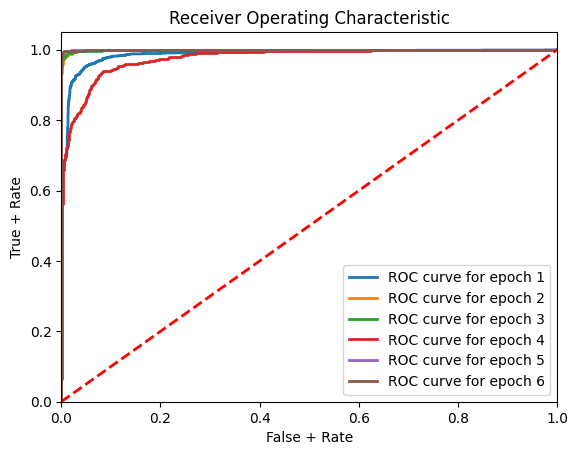

In [18]:
#for plot roc
import matplotlib.pyplot as plt

plt.figure()
lw = 2
for i, (fpr, tpr) in enumerate(for_roc):
    plt.plot(fpr, tpr, lw=lw, label='ROC curve for epoch %d' % (i + 1))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False + Rate')
plt.ylabel('True + Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")
plt.show()